In [1]:
import numpy as np # linear algebra import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import os

In [2]:
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.shape

(53927, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53927 entries, 0 to 53926
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              53927 non-null  int64  
 1   ObservationDate  53927 non-null  object 
 2   Province/State   32870 non-null  object 
 3   Country/Region   53927 non-null  object 
 4   Last Update      53927 non-null  object 
 5   Confirmed        53927 non-null  float64
 6   Deaths           53927 non-null  float64
 7   Recovered        53927 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.3+ MB


# We will convert ObservationDate and Last Update to datetime since they are currently taken as object

In [6]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

In [7]:
#Data Available till 30th JUNE
from datetime import date
recent=df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
#df_update=df.loc[df.ObservationDate<pd.Timestamp(date(2020,4,30))]
df_update

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
53198,53199,2020-06-30,NaN,Afghanistan,2020-07-01 04:33:52,31517,746,14131
53199,53200,2020-06-30,NaN,Albania,2020-07-01 04:33:52,2535,62,1459
53200,53201,2020-06-30,NaN,Algeria,2020-07-01 04:33:52,13907,912,9897
53201,53202,2020-06-30,NaN,Andorra,2020-07-01 04:33:52,855,52,799
53202,53203,2020-06-30,NaN,Angola,2020-07-01 04:33:52,284,13,93
...,...,...,...,...,...,...,...,...
53922,53923,2020-06-30,Zacatecas,Mexico,2020-07-01 04:33:52,908,96,626
53923,53924,2020-06-30,Zakarpattia Oblast,Ukraine,2020-07-01 04:33:52,2889,91,943
53924,53925,2020-06-30,Zaporizhia Oblast,Ukraine,2020-07-01 04:33:52,572,17,418
53925,53926,2020-06-30,Zhejiang,Mainland China,2020-07-01 04:33:52,1269,1,1267


In [8]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     169
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

Out of the 53297 records we are now left with only 729 and many of the records dont have a Province defined.
These are mostly provinces that are not part of China.

In [9]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [10]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

We perform encoding of the Country to CountryID and Province to ProvinceID

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ProvinceID,CountryID
53198,53199,2020-06-30,Afghanistan,Afghanistan,2020-07-01 04:33:52,31517,746,14131,3,0
53199,53200,2020-06-30,Albania,Albania,2020-07-01 04:33:52,2535,62,1459,10,1
53200,53201,2020-06-30,Algeria,Algeria,2020-07-01 04:33:52,13907,912,9897,12,2
53201,53202,2020-06-30,Andorra,Andorra,2020-07-01 04:33:52,855,52,799,22,3
53202,53203,2020-06-30,Angola,Angola,2020-07-01 04:33:52,284,13,93,23,4


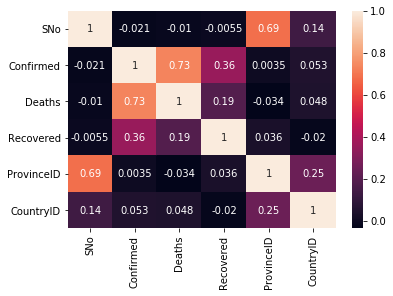

In [12]:
corr= df_update.corr()
sns.heatmap(corr,annot=True)

NO RELATION

# Printing the unique Countries and their count

In [13]:
print(df['Country/Region'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia'
 'Pales

# Representation of confirmed cases per country

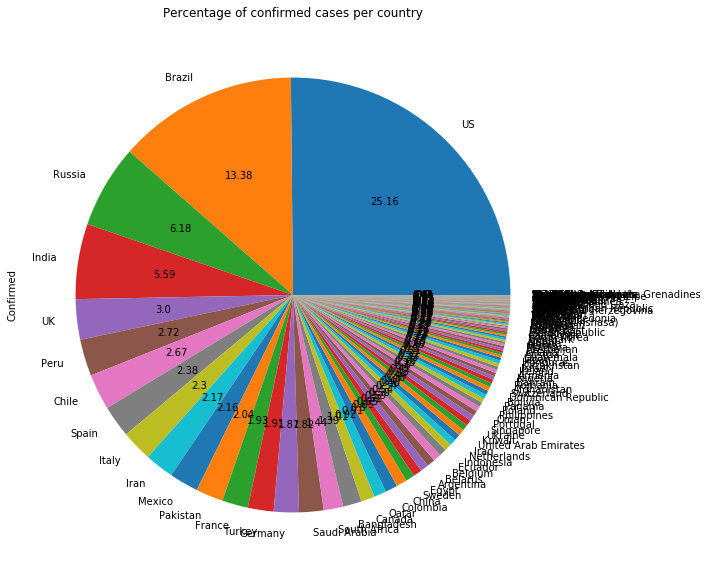

In [14]:
fig = plt.figure(figsize=(10,10))
conf_per_country = df_update.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
conf_sum=df_update['Confirmed'].sum()
def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country',autopct=absolute_value)

plt.show ()

In [15]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

,Country/Region,Confirmed,Recovered,Deaths
0,US,2635417,720631,127417
1,Brazil,1402041,788318,59594
2,Russia,646929,411973,9306
3,India,585493,347979,17400
4,UK,314160,1370,43815


Among the top 5 countries with maximum confirmed cases Russia is doing better followed by India if we consider both the recovery and the death rate

In [16]:
group_cases['Recovery Rate']=round(group_cases['Recovered'] / group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths'] / group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered,Deaths,Recovery Rate,Death Rate
0,US,2635417,720631,127417,0.270000,0.050000
1,Brazil,1402041,788318,59594,0.560000,0.040000
2,Russia,646929,411973,9306,0.640000,0.010000
3,India,585493,347979,17400,0.590000,0.030000
4,UK,314160,1370,43815,0.000000,0.140000


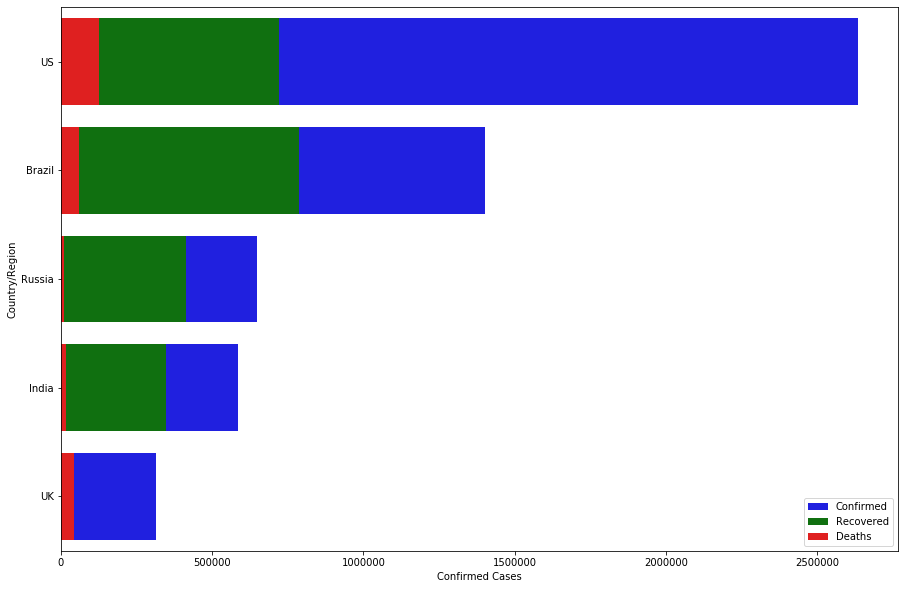

In [17]:
f, ax = plt.subplots(figsize=(15, 10))
bar1=sns.barplot(x="Confirmed",y="Country/Region",data=group_cases,
            label="Confirmed", color="b")


bar2=sns.barplot(x="Recovered", y="Country/Region", data=group_cases,
            label="Recovered", color="g")


bar3=sns.barplot(x="Deaths", y="Country/Region", data=group_cases,
            label="Deaths", color="r")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()

The ratio of recovered and death cases are shown below for the top 5 countries that have reported max deaths. UK has seen more deaths than recoveries while US leads in the number of deaths due to COVID19

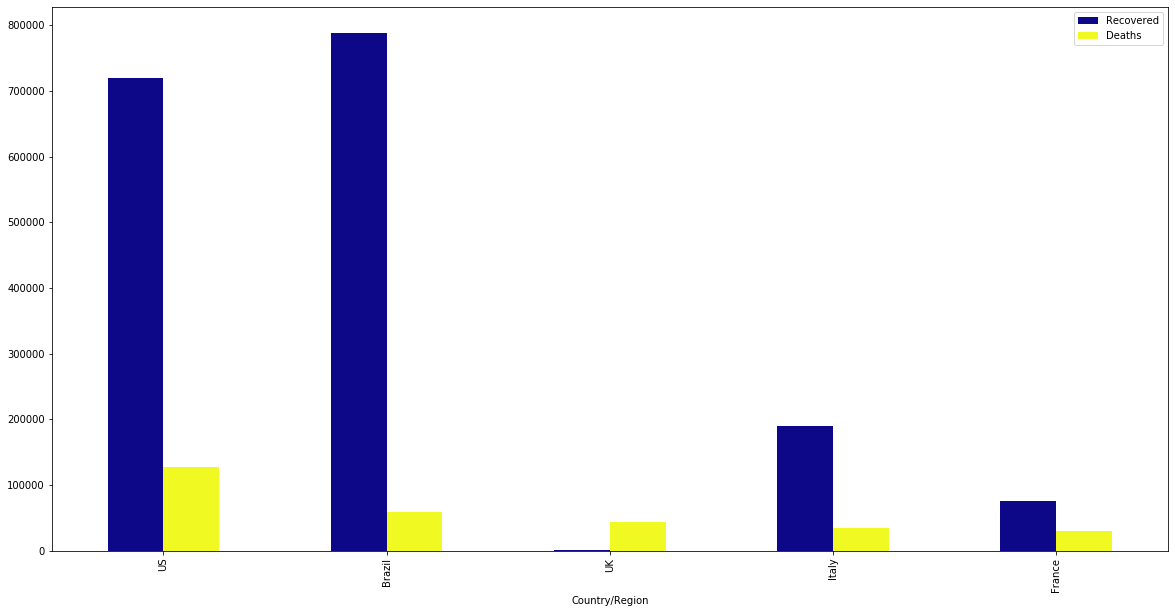

In [18]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

# World(excluding China)

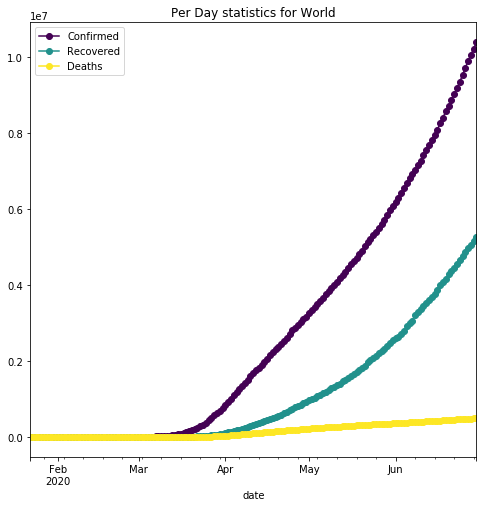

In [19]:
global_cases_complete=df.loc[~(df['Country/Region']=='China')]
global_cases_complete['date'] = global_cases_complete['ObservationDate'].dt.date
global_cases_complete['date']=pd.to_datetime(global_cases_complete['date'])
global_cases_complete = global_cases_complete[global_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = global_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for World',colormap='viridis',marker='o')
plt.show()

In [20]:
num_plot_global=num_plot.reset_index()
num_plot_global['Death Case Increase']=0
num_plot_global['Confirmed Case Increase']=0
num_plot_global['Confirmed Case Increase'][0]=0
num_plot_global['Death Case Increase'][0]=0
for i in range(1,num_plot_global.shape[0]):
    num_plot_global['Confirmed Case Increase'][i]=-(num_plot_global.iloc[i-1][1]-num_plot_global.iloc[i][1])
    num_plot_global['Death Case Increase'][i]=-(num_plot_global.iloc[i-1][3]-num_plot_global.iloc[i][3])
num_plot_global.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
156,2020-06-26,9718089,4867113,489547,4869,191722
157,2020-06-27,9896035,4973413,494076,4529,177946
158,2020-06-28,10062279,5062439,497259,3183,166244
159,2020-06-29,10218620,5157344,500871,3612,156341
160,2020-06-30,10392304,5274792,506619,5748,173684


# Confirmed Case Increase

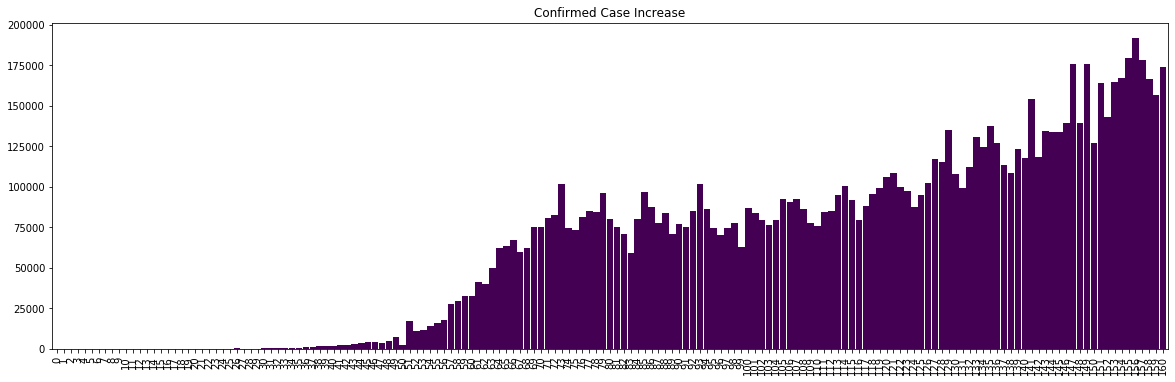

In [21]:
num_plot_global['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='viridis')
plt.show()

# Death Case Increase

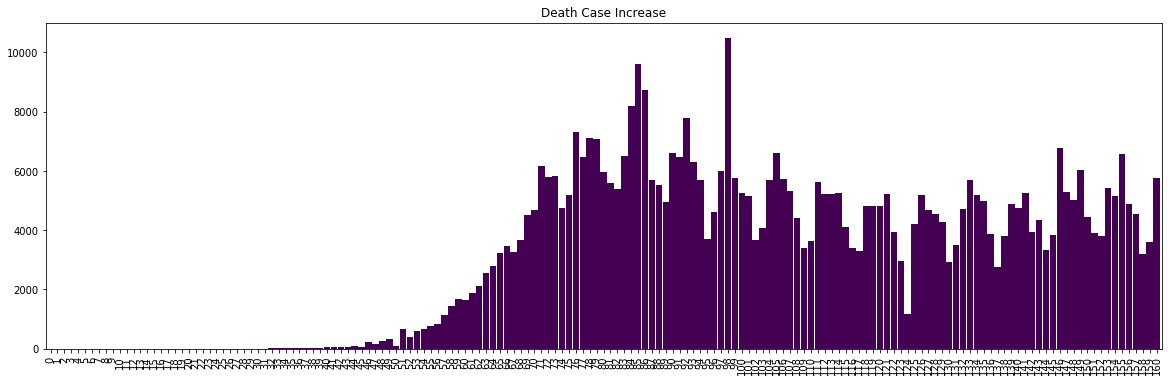

In [22]:
num_plot_global['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='viridis')
plt.show()

# INDIA

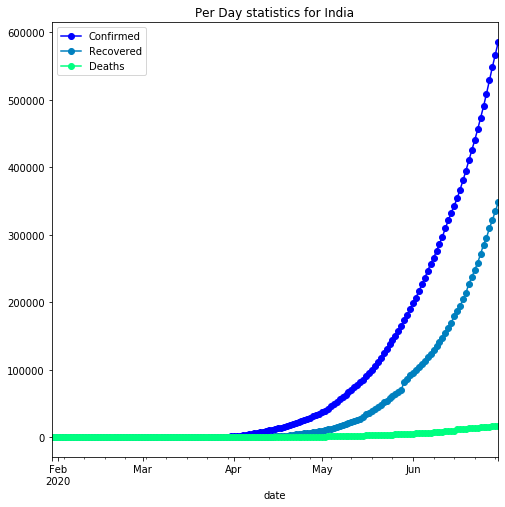

In [23]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot['Confirmed'][132]=287154
num_plot['Recovered'][132]=140928
num_plot['Deaths'][132]=8106
num_plot['Confirmed'][134]=309595
num_plot['Recovered'][134]=154235
num_plot['Deaths'][134]=8888
num_plot['Confirmed'][135]=321634
num_plot['Recovered'][135]=162327
num_plot['Deaths'][135]=9197
num_plot['Confirmed'][136]=333039
num_plot['Recovered'][136]=169684
num_plot['Deaths'][136]=9521
num_plot['Confirmed'][137]=343071
num_plot['Recovered'][137]=180324
num_plot['Deaths'][137]=9917
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India',marker='o')
num_plot_india=num_plot.reset_index()

In [24]:
num_plot_india['Confirmed Case Increase']=0
num_plot_india['Death Case Increase']=0
#num_plot_india['Confirmed'][132]=287154
#num_plot_india['Recovered'][132]=140928
#num_plot_india['Deaths'][132]=8106
#num_plot_india['Confirmed'][134]=309595
#num_plot_india['Recovered'][134]=154235
#num_plot_india['Deaths'][134]=8888
#num_plot_india['Confirmed'][135]=321634
#num_plot_india['Recovered'][135]=162327
#num_plot_india['Deaths'][135]=9197
#num_plot_india['Confirmed'][136]=333039
#num_plot_india['Recovered'][136]=153792
#num_plot_india['Deaths'][136]=9521
#num_plot_india['Confirmed'][137]=343071
#num_plot_india['Recovered'][137]=180324
#num_plot_india['Deaths'][137]=9917
for i in range(1,num_plot_india.shape[0]):
    num_plot_india['Confirmed Case Increase'][i]=-(num_plot_india.iloc[i-1][1]-num_plot_india.iloc[i][1])
    num_plot_india['Death Case Increase'][i]=-(num_plot_india.iloc[i-1][3]-num_plot_india.iloc[i][3])
num_plot_india.tail(10)

,date,Confirmed,Recovered,Deaths,Confirmed Case Increase,Death Case Increase
143,2020-06-21,425282,237196,13699,14821,445
144,2020-06-22,440215,248190,14011,14933,312
145,2020-06-23,456183,258685,14476,15968,465
146,2020-06-24,473105,271697,14894,16922,418
147,2020-06-25,490401,285637,15301,17296,407
148,2020-06-26,508953,295881,15685,18552,384
149,2020-06-27,528859,309713,16095,19906,410
150,2020-06-28,548318,321723,16475,19459,380
151,2020-06-29,566840,334822,16893,18522,418
152,2020-06-30,585493,347979,17400,18653,507


27th June has recorded highest number of COVID19 confirmed cases in India in a day (19906). In the last few days the peak in cases have been increasing almost everyday.

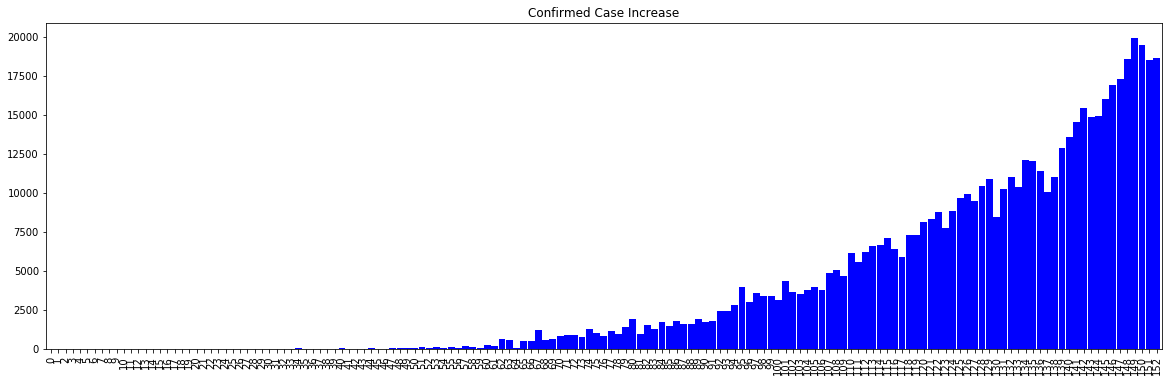

In [25]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.show()

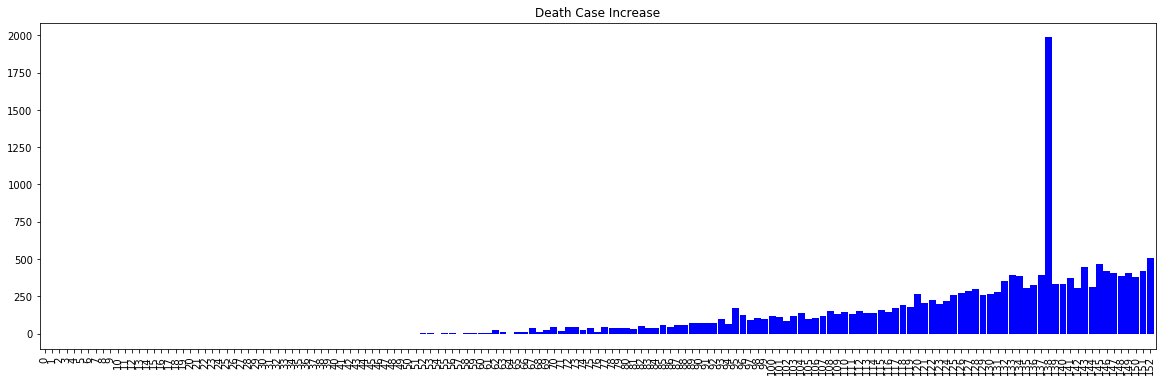

In [26]:
num_plot_india['Death Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Death Case Increase')
plt.show()

# EXPLORING

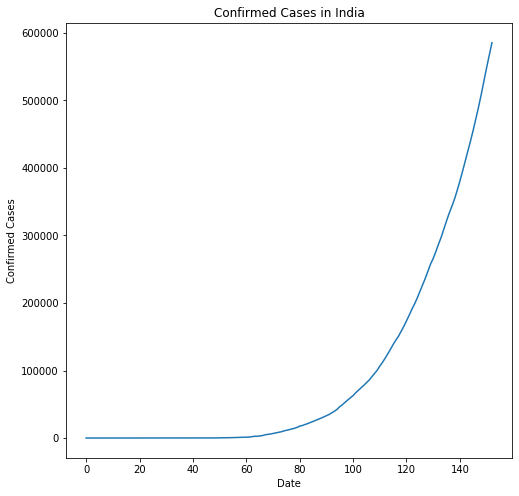

In [30]:
#Current number of confirmed cases
ax = num_plot_india['Confirmed'].plot(title="Confirmed Cases in India",figsize=(8,8));
ax.set(xlabel="Date", ylabel="Confirmed Cases");

In [31]:
train = num_plot_india.iloc[:-5,:2]
test = num_plot_india.iloc[-5:,:2]

In [32]:
train.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

In [35]:
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()
model = Prophet(changepoint_prior_scale=0.4, changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-18'])
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


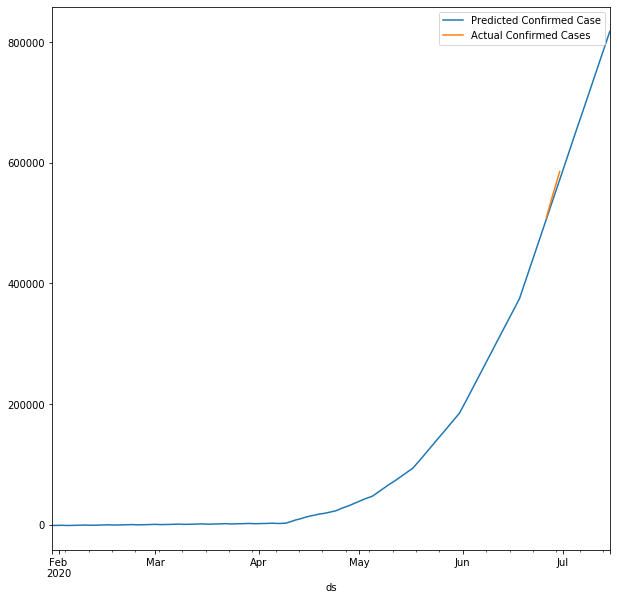

In [36]:
future_dates = model.make_future_dataframe(periods=20)
forecast =  model.predict(future_dates)
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Case',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Cases',legend=True,ax=ax)

# Accuracy

In [37]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='70 days', period='40 days', horizon = '3 days')
df_cv.head()
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-05-13 00:00:00 and 2020-06-22 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1.548952e+06,1244.568927,943.177079,0.002724,0.002724,1.0
1,2 days,1.047110e+06,1023.283946,748.134061,0.001820,0.001820,1.0
2,3 days,1.051343e+06,1025.350338,1021.659446,0.007068,0.007068,1.0


In [38]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
153,2020-07-01,588469.819433,585226.340254,591523.573950,586863.702713,589990.200458,-167.744645,-167.744645,-167.744645,-167.744645,-167.744645,-167.744645,0.0,0.0,0.0,588302.074788
154,2020-07-02,604864.848693,601369.133435,608635.609538,601824.760797,607083.134238,82.145374,82.145374,82.145374,82.145374,82.145374,82.145374,0.0,0.0,0.0,604946.994067
155,2020-07-03,621259.877953,616624.510164,625206.690165,616879.348182,624833.660237,12.315856,12.315856,12.315856,12.315856,12.315856,12.315856,0.0,0.0,0.0,621272.193809
156,2020-07-04,637654.907213,631509.607250,643080.148977,631677.756862,643407.200457,101.525292,101.525292,101.525292,101.525292,101.525292,101.525292,0.0,0.0,0.0,637756.432505
157,2020-07-05,654049.936472,646109.903511,662262.155613,646079.880838,662176.047492,291.190742,291.190742,291.190742,291.190742,291.190742,291.190742,0.0,0.0,0.0,654341.127215
158,2020-07-06,670444.965732,660503.347808,680530.589036,660125.043781,679994.586408,-83.383229,-83.383229,-83.383229,-83.383229,-83.383229,-83.383229,0.0,0.0,0.0,670361.582503
159,2020-07-07,686839.994992,674671.730335,698960.415688,674640.790134,698253.915498,-236.049390,-236.049390,-236.049390,-236.049390,-236.049390,-236.049390,0.0,0.0,0.0,686603.945602
160,2020-07-08,703235.024252,687784.400066,717298.987257,688295.716248,717244.380657,-167.744645,-167.744645,-167.744645,-167.744645,-167.744645,-167.744645,0.0,0.0,0.0,703067.279606
161,2020-07-09,719630.053511,701716.334106,736818.555058,702459.417863,736068.033672,82.145374,82.145374,82.145374,82.145374,82.145374,82.145374,0.0,0.0,0.0,719712.198886
162,2020-07-10,736025.082771,715942.037461,755504.999105,716312.968713,755400.769748,12.315856,12.315856,12.315856,12.315856,12.315856,12.315856,0.0,0.0,0.0,736037.398627


Prediction considering till when entire population of India will be impacted

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


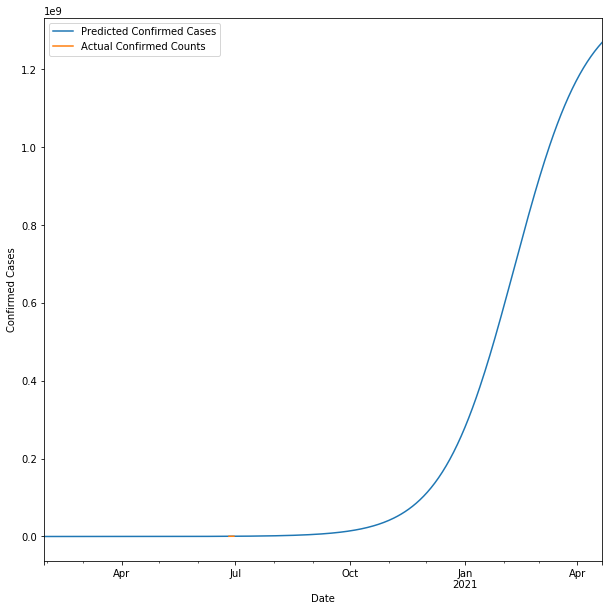

In [39]:
from fbprophet import Prophet
model_india = Prophet(growth="logistic",changepoint_prior_scale=0.4,changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-18'])
pop = 1380004385 #from worldometers
train['cap'] = pop
model_india.fit(train)
# Future Prediction
future_dates = model_india.make_future_dataframe(periods=300)
future_dates['cap'] = pop
forecast =  model_india.predict(future_dates)
# Plotting
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Cases',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Confirmed Cases");

In [40]:
forecast.iloc[130:160]

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
130,2020-06-08,263332.105036,1380004385,261479.763512,265180.759001,263332.105036,263332.105036,-12.732980,-12.732980,-12.732980,-12.732980,-12.732980,-12.732980,0.0,0.0,0.0,263319.372057
131,2020-06-09,273457.982412,1380004385,271614.616527,275250.765848,273457.982412,273457.982412,-111.777260,-111.777260,-111.777260,-111.777260,-111.777260,-111.777260,0.0,0.0,0.0,273346.205151
132,2020-06-10,283973.148778,1380004385,282173.552012,285620.701835,283973.148778,283973.148778,-41.834670,-41.834670,-41.834670,-41.834670,-41.834670,-41.834670,0.0,0.0,0.0,283931.314108
133,2020-06-11,294892.564056,1380004385,293145.998970,296535.373561,294892.564056,294892.564056,-28.481632,-28.481632,-28.481632,-28.481632,-28.481632,-28.481632,0.0,0.0,0.0,294864.082424
134,2020-06-12,306231.762565,1380004385,304403.531663,308102.926722,306231.762565,306231.762565,-45.635400,-45.635400,-45.635400,-45.635400,-45.635400,-45.635400,0.0,0.0,0.0,306186.127165
135,2020-06-13,318006.875040,1380004385,316284.125855,319920.293640,318006.875040,318006.875040,80.035427,80.035427,80.035427,80.035427,80.035427,80.035427,0.0,0.0,0.0,318086.910468
136,2020-06-14,330234.651490,1380004385,328589.955243,332286.789498,330234.651490,330234.651490,160.426515,160.426515,160.426515,160.426515,160.426515,160.426515,0.0,0.0,0.0,330395.078005
137,2020-06-15,342932.484924,1380004385,341058.914932,344694.162647,342932.484924,342932.484924,-12.732980,-12.732980,-12.732980,-12.732980,-12.732980,-12.732980,0.0,0.0,0.0,342919.751945
138,2020-06-16,356118.435991,1380004385,354340.766880,357821.060566,356118.435991,356118.435991,-111.777260,-111.777260,-111.777260,-111.777260,-111.777260,-111.777260,0.0,0.0,0.0,356006.658731
139,2020-06-17,369811.258552,1380004385,367921.167603,371473.836837,369811.258552,369811.258552,-41.834670,-41.834670,-41.834670,-41.834670,-41.834670,-41.834670,0.0,0.0,0.0,369769.423882


# Using ARIMA

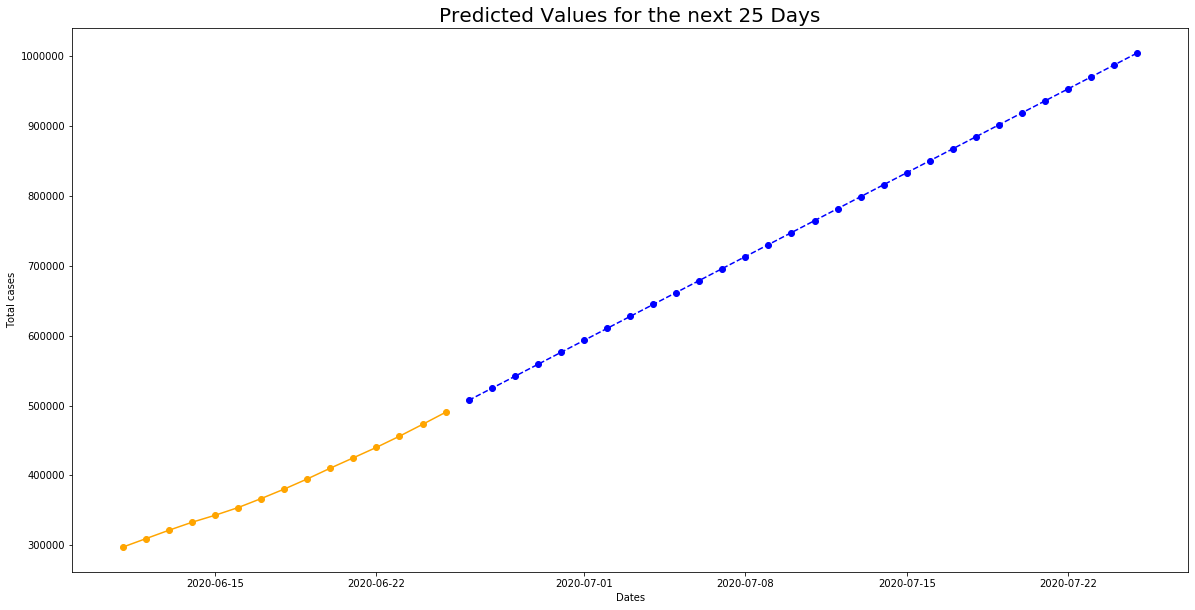

In [41]:
from statsmodels.tsa.arima_model import ARIMA
import datetime
arima = ARIMA(train['y'], order=(3, 1, 0))
arima = arima.fit(trend='nc', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])
start_date = train['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (20,10))
plt.xlabel("Dates",fontsize = 10)
plt.ylabel('Total cases',fontsize = 10)
plt.title("Predicted Values for the next 25 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'blue',label = 'Predicted')
plt.plot_date(y=train['y'].tail(15),x=train['ds'].tail(15),linestyle = '-',color = 'orange',label = 'Actual')

ARIMA is predicting 7.96L confirmed cases on 13th July

In [42]:
pred=pd.DataFrame(forecast[0],columns=['Predicted'])
dates=pd.DataFrame(prediction_dates,columns=['Date'])
arima_df=pd.merge(dates,pred,right_index=True,left_index=True)
arima_df.tail(30)

,Date,Predicted
0,2020-06-26,5.075322e+05
1,2020-06-27,5.246577e+05
2,2020-06-28,5.418004e+05
3,2020-06-29,5.589405e+05
4,2020-06-30,5.760794e+05
5,2020-07-01,5.932188e+05
6,2020-07-02,6.103582e+05
7,2020-07-03,6.274976e+05
8,2020-07-04,6.446369e+05
9,2020-07-05,6.617763e+05


In [43]:
test=test.reset_index()

In [44]:
df1=pd.DataFrame(forecast[0],columns=['yhat'])
df2=pd.DataFrame(prediction_dates,columns=['ds'])
df3=test['y']
df4=pd.merge(df2,df3,right_index=True,left_index=True)
df5=pd.merge(df4,df1,right_index=True,left_index=True)

In [45]:
df5['mse'],df5['rmse'],df5['mae'],df5['mape'],df5['mdape']=[0,0,0,0,0]

In [46]:
for t in range(len(test)):
    mape =  np.mean(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mape'][t]="{:.5f}".format(mape)
    mdape =  np.median(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mdape'][t]="{:.5f}".format(mdape)
    mae = np.mean(np.abs(df5['yhat'][t] - df5['y'][t]))
    df5['mae'][t]=mae
    mse = np.mean((df5['yhat'][t] - df5['y'][t])**2)
    df5['mse'][t]=mse
    rmse = np.mean((df5['yhat'][t] - df5['y'][t])**2)**.5
    df5['rmse'][t]=rmse

Accuracy Metrics for ARIMA

In [47]:
df5

,ds,y,yhat,mse,rmse,mae,mape,mdape
0,2020-06-26,508953,507532.193468,2018691,1420,1420,0.00279,0.00279
1,2020-06-27,528859,524657.650528,17651337,4201,4201,0.00794,0.00794
2,2020-06-28,548318,541800.448668,42478475,6517,6517,0.01189,0.01189
3,2020-06-29,566840,558940.534310,62401558,7899,7899,0.01394,0.01394
4,2020-06-30,585493,576079.422060,88615449,9413,9413,0.01608,0.01608
